In [110]:
import seaborn as sns
from lib.AG import AG

<AxesSubplot:>

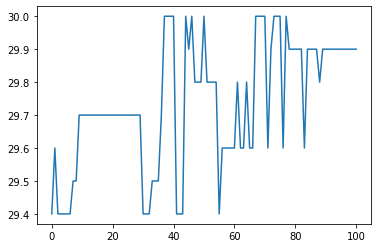

In [111]:
pesos = [3.5, 5.4, 4.7, 1.9, 5.6, 1.3, 3.8, 5.4 , 6.0, 4.6, 5.3, 4.9, 6.6, 6.1, 2.9, 3.9, 1.9, 1.8, 4.8, 5.0]

# Inicialização do algoritmo
ag = AG(100, 20, GERACAO=100)
ag.set_capacidade(30.0)
ag.set_pesos(pesos)
melhores = ag.evolucao()

# melhores
sns.lineplot(data=melhores[:,0])

In [112]:
#Funcao para alocar os resultados em um vetor, pega o resultado, armazena e retira do vetor, e chama a função novamente
vetmelhores = []
def teste(pesos):
    if pesos.sum() > 30:
        print("Peso: ", pesos, pesos.sum())
        ag = AG(100, pesos.size, GERACAO=100)
        ag.set_capacidade(30.0)
        ag.set_pesos(pesos)
        melhores = ag.evolucao()
        vetmelhores.append(melhores[melhores[:,0].argmax()][0])
        print("Vetor final: ", vetmelhores)
        controle = np.array(melhores[melhores[:,0].argmax()][1])
        controle_invertido = (~controle)+2
        aux = pesos*controle_invertido
        new = aux[aux!=0]
        print("Novo: ", new, new.sum())
        print(" ")
        teste(new)
    else:
        vetmelhores.append(pesos.sum())
        print(vetmelhores)
    return vetmelhores

In [113]:
#O problema é: a soma dos pesos da entrada é diferente da soma final, isso acontece por algum motivo desconhecido
#O arquivo pesos2.csv contem os 40 primeiros numeros do pesos.csv que foi disponibilizado.
import numpy as np
peso = np.genfromtxt('pesos2.csv',delimiter=';')
print(peso.sum())
vet = teste(peso)
vetArray = np.array(vet)
print(vetArray.sum())
vetArray

97.32
Peso:  [2.12 3.44 2.21 1.79 2.25 0.38 3.92 2.44 2.06 1.36 0.81 4.68 3.42 1.58
 3.25 4.76 1.32 3.82 2.56 1.9  0.93 0.56 1.14 4.25 0.46 4.33 0.63 2.98
 3.1  3.5  2.04 2.4  4.05 3.97 0.76 2.75 1.84 4.32 2.04 1.2 ] 97.32
Vetor final:  [29.990000000000002]
Novo:  [2.12 3.44 2.21 1.79 2.25 3.92 2.06 1.36 0.81 3.42 1.58 3.25 4.76 1.32
 3.82 2.56 0.93 0.56 0.46 4.33 2.98 3.5  2.04 2.4  4.05 2.75 1.84 2.04] 68.55000000000001
 
Peso:  [2.12 3.44 2.21 1.79 2.25 3.92 2.06 1.36 0.81 3.42 1.58 3.25 4.76 1.32
 3.82 2.56 0.93 0.56 0.46 4.33 2.98 3.5  2.04 2.4  4.05 2.75 1.84 2.04] 68.55000000000001
Vetor final:  [29.990000000000002, 30.0]
Novo:  [2.12 2.21 1.79 2.25 3.92 2.06 1.36 0.81 1.58 1.32 2.56 0.56 0.46 4.33
 2.98 2.04 2.4  4.05 2.75] 41.55
 
Peso:  [2.12 2.21 1.79 2.25 3.92 2.06 1.36 0.81 1.58 1.32 2.56 0.56 0.46 4.33
 2.98 2.04 2.4  4.05 2.75] 41.55
Vetor final:  [29.990000000000002, 30.0, 30.0]
Novo:  [2.12 2.21 2.06 1.36 0.81 1.32 0.56 4.05] 14.489999999999998
 
[29.990000000000002, 3

array([29.99, 30.  , 30.  , 14.49])

In [ ]:
controle = melhores[melhores[:,0].argmax()][1]
controle_invertido = (~controle)+2
teste = pesos*controle_invertido
new = teste[teste!=0]
new